# FYS375 Modellering av solfanger
Gruppe 3 - Høst 2021

Likevekt:  
Innstrålt +- 32  
Ta =- 1.5  
Tintlet -= 1  
massestrøm =- 2% av maximal, eller +-1% av mean value

In [307]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [102]:
data = pd.read_csv("Måledata_mars_juli_2020.csv")
data.Time = pd.to_datetime(data.Time)
data

,Time,Irradiance (W/m2),Ambient Temperature (C),Inlet Temperature (C),Mass flow (g/s),Outlet Temperature (C)
0,2020-03-01 00:01:00,0.0,0.4,15.6,107.0,23.6
1,2020-03-01 00:02:00,0.0,0.4,15.6,107.0,23.6
2,2020-03-01 00:03:00,0.0,0.4,15.6,107.0,23.6
3,2020-03-01 00:04:00,0.0,0.4,15.6,107.0,23.6
4,2020-03-01 00:05:00,0.0,0.4,15.6,107.0,23.6
...,...,...,...,...,...,...
220314,2020-07-31 23:55:00,-1.0,17.7,25.5,0.0,26.9
220315,2020-07-31 23:56:00,-1.0,17.8,25.5,0.0,26.9
220316,2020-07-31 23:57:00,-1.0,17.8,25.5,0.0,26.9
220317,2020-07-31 23:58:00,-1.0,17.8,25.5,0.0,26.9


In [82]:
data_irra = data[data["Irradiance (W/m2)"] > 790]

In [83]:
data_irra

,Time,Irradiance (W/m2),Ambient Temperature (C),Inlet Temperature (C),Mass flow (g/s),Outlet Temperature (C)
12151,2020-03-09 10:32:00,851.0,6.7,26.0,0.0,23.75
12193,2020-03-09 11:14:00,828.0,6.7,26.4,0.0,23.95
12194,2020-03-09 11:15:00,872.0,6.8,26.3,0.0,23.95
12209,2020-03-09 11:30:00,909.0,7.2,25.6,0.0,23.85
12210,2020-03-09 11:31:00,804.0,7.4,25.6,0.0,23.85
...,...,...,...,...,...,...
219833,2020-07-31 15:54:00,804.0,24.8,22.3,347.0,43.35
219834,2020-07-31 15:55:00,800.0,24.8,22.3,347.0,43.50
219835,2020-07-31 15:56:00,801.0,24.8,22.3,345.0,43.60
219836,2020-07-31 15:57:00,799.0,25.1,22.3,352.0,43.60


In [128]:
np_data = data_irra.to_numpy()
np_data

array([[Timestamp('2020-03-09 10:32:00'), 851.0, 6.7, 26.0, 0.0, 23.75],
       [Timestamp('2020-03-09 11:14:00'), 828.0, 6.7, 26.4, 0.0, 23.95],
       [Timestamp('2020-03-09 11:15:00'), 872.0, 6.8, 26.3, 0.0, 23.95],
       ...,
       [Timestamp('2020-07-31 15:56:00'), 801.0, 24.8, 22.3, 345.0, 43.6],
       [Timestamp('2020-07-31 15:57:00'), 799.0, 25.1, 22.3, 352.0, 43.6],
       [Timestamp('2020-07-31 15:58:00'), 793.0, 25.4, 22.3, 350.0, 43.6]],
      dtype=object)

In [141]:
info = []
for i, (tid, irradiance, Ta, Ti, ms, To) in enumerate(np_data[15:]):
    if tid - np_data[i][0] == pd.Timedelta("15m"):
        # save all 15 minutes innside infomration
        info.append(np_data[i:i+15])

In [142]:
info = np.array(info)
info.shape

(11706, 15, 6)

In [166]:
innenfor_krav = []

for intervall15min in info:
    ir_mean, Ta_mean, Ti_mean, _, To_mean = (np.mean(intervall15min[:,1:], axis=0))
    if (np.max(abs(ir_mean - intervall15min[:,1])) <= 32 and 
        np.max(abs(Ta_mean - intervall15min[:,2])) <= 1.5 and 
        np.max(abs(To_mean - intervall15min[:,5])) <= 1 and
        np.min(intervall15min[:,4]) >= 50):

        innenfor_krav.append(intervall15min)
innenfor_krav = np.array(innenfor_krav)

In [167]:
innenfor_krav.shape

(8529, 15, 6)

In [274]:
femtenmin_split = np.array(innenfor_krav[0:2])

for v in innenfor_krav[2:]:
    if not np.isin(v[:,0], femtenmin_split[:, :, 0]).any():
        #print("legger til")
        femtenmin_split = np.append(femtenmin_split, [v], axis=0)


In [281]:
femtenmin_split = femtenmin_split[1:]

In [284]:
femtenmin_split.shape

(652, 15, 6)

Bruker (1) for hvert punkt  
$\frac{T_i - T_a}{G_T}$  Tm2/W  

Solfanger er 67,2 m2  
Det betyr at max effekt er A * $G_T$  
Virkinggrad er da Q / max effekt  
Q er hvor mye effekt som har gått ned i å varme opp vannet. Q = m * c * delta T   [g/s * j/(kg * K) * K] =
[g/s * j/kg] = [g/s * j/g] = [j/s] = [W]

4.183 j/g K  
$Q = \dot{m} * c * \Delta T $ [W]

MAx effetk  
$GA = G * A $  
Der A = 67.2 m2 og G = G



In [319]:
X = []
Q = []
GA = []
for i in femtenmin_split:
    ir_mean, Ta_mean, Ti_mean, m_s_mean, To_mean = np.mean(i[:, 1:], axis=0)
    
    # X formelen
    x = (Ti_mean - Ta_mean)/ir_mean 
    X.append(x)
    
    # Q formelen
    q = m_s_mean * 4.183 * (To_mean - Ti_mean)
    Q.append(q)
    
    # GA foremlen
    ga = ir_mean * 67.2
    GA.append(ga)

X = np.array(X)
Q = np.array(Q)

n = Q/GA

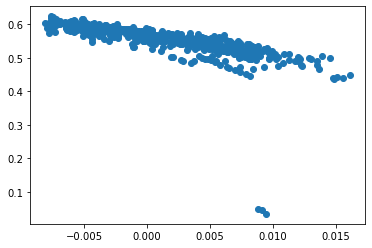

In [321]:
plt.scatter(X,n)

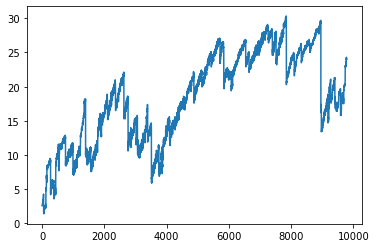

In [314]:
plt.plot(femtenmin_split[:, :, 2].flatten())

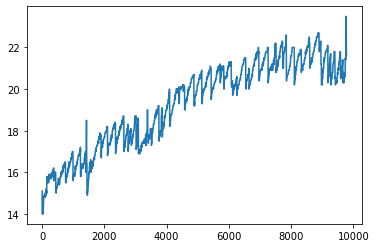

In [315]:
plt.plot(femtenmin_split[:, :, 3].flatten())